In [12]:
#Import required libraries:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
#Reading the images from local directory:
image_nm = cv2.imread("C:/Users/Phase/Pictures/NM.jpg")
image_db = cv2.imread("C:/Users/Phase/Desktop/ME-THESIS-TEMPLATE/IMAGE-DB/gt_db/s02/06.jpg")
image_tejas = cv2.imread("C:/Users/Phase/Desktop/KYC-TEJAS/recent_photo-Tejas Phase.JPG")
image_group = cv2.imread("C:/Users/Phase/Downloads/Astronaut_Group_18.jpg")

In [60]:
#fig = plt.figure()

In [61]:
#type(fig)

In [58]:
fig,ax_lst = fig.subplots(2,2)

In [64]:
type(fig)

numpy.ndarray

In [62]:
ax_lst

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000250F92EBE10>,
      dtype=object)

In [65]:
type(ax_lst)

numpy.ndarray

Text(0.5,1,'Group Image')

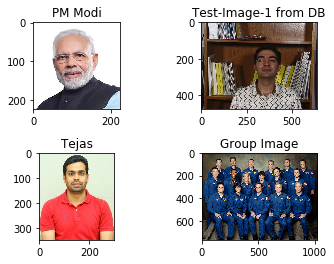

In [14]:
#Let's try to look all those images:
#Create an object of "figure" class:
fig = plt.figure()
fig.subplots_adjust(hspace=0.5)

#Adding axis at position 1 in 2x2 grid and showing an image on it:
ax1 = fig.add_subplot(2,2,1)
image_nm = cv2.cvtColor(image_nm,cv2.COLOR_BGR2RGB)
ax1.imshow(image_nm)
ax1.set_title("PM Modi")


#Adding axis at position 2 in 2x2 grid and showing an image on it:
ax2 = fig.add_subplot(2,2,2)
image_db = cv2.cvtColor(image_db,cv2.COLOR_BGR2RGB)
ax2.imshow(image_db)
ax2.set_title("Test-Image-1 from DB")


#Adding axis at position 3 in 2x2 grid and showing an image on it:
ax3 = fig.add_subplot(2,2,3)
image_tejas = cv2.cvtColor(image_tejas,cv2.COLOR_BGR2RGB)
ax3.imshow(image_tejas)
ax3.set_title("Tejas")


#Adding axis at position 4 in 2x2 grid and showing an image on it:
ax4 = fig.add_subplot(2,2,4)
image_group = cv2.cvtColor(image_group,cv2.COLOR_BGR2RGB)
ax4.imshow(image_group)
ax4.set_title("Group Image")

In [4]:
#face_cascade = cv2.CascadeClassifier("C:/Users/Phase/Desktop/CUSTOM-HAAR-CASCADE/classifier/cascade.xml")
#face_cascade

In [15]:
#Create an Object of Cascade Classifier:
cascade_classifier = cv2.CascadeClassifier("C:/Users/Phase/Desktop/haarcascades/haarcascade_frontalface_default.xml")

In [17]:
#Let's write one function for image input and detect face:
def detect_face(img):
    
    #Create a copy of the original image:
    face_img = img.copy()
    
    
    #Call MultiScale method of classifier:
    face_rects = cascade_classifier.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)
    
    #Draw rectangle around detected face:
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(0,0,255),5)
    
    return face_img 

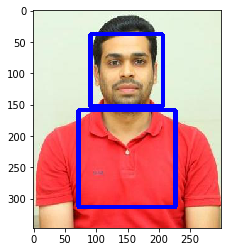

In [18]:
#Let's run our function on an image which has single face:
result_img_single_face = detect_face(image_tejas)

#View the result image:
plt.imshow(result_img_single_face)
plt.show()

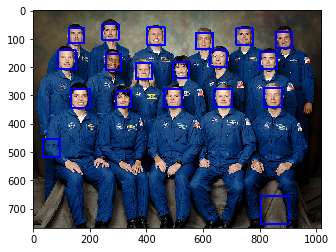

In [19]:
#Now let's run function on an image which has multiple faces in it(essentially a group photo):
result_image_multi_face = detect_face(image_group)

#View the result image:
plt.imshow(result_image_multi_face)
plt.show()

In [20]:
def adjusted_detect_face(img):
    
    #Create a copy of the original image:
    face_img = img.copy()
    
    #Call MultiScale method of classifier:
    face_rects = cascade_classifier.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=9)
    
    #Draw rectangle around detected face:
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(0,0,255),5)
    
    return face_img 

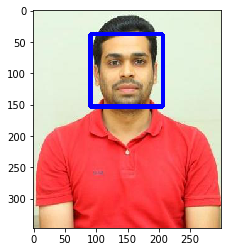

In [21]:
#Let's run our function on any image:
result_img = adjusted_detect_face(image_tejas)

#View the image:
plt.imshow(result_img)
plt.show()

In [22]:
#Create an object of Eye-Cascade classifier:
eye_cascade = cv2.CascadeClassifier("C:/Users/Phase/Downloads/Computer-Vision-with-Python/DATA/haarcascades/haarcascade_eye.xml")

In [35]:
#Create an object of Eye-Cascade classifier(eyes with sunglasses):
#eye_glasses_cascade = cv2.CascadeClassifier("C:/Users/Phase/Downloads/Computer-Vision-with-Python/DATA/haarcascades/haarcascade_eye_tree_eyeglasses.xml")

In [26]:
#Let's write one function for image input and detect eyes:
def detect_eyes(img):
    
    #Create a copy of the original image:
    face_img = img.copy()
    
    #Call MultiScale method of classifier:
    eyes_rects = eye_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=9)
    
    #Draw rectangle around detected face:
    for (x,y,w,h) in eyes_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(0,0,255),5)
    
    return face_img 

In [43]:
'''
def detect_eyes_with_glasses(img):
    
    #Create a copy of an original images:
    face_img = img.copy()
    
    #Call Multiscale method of classifier:
    eyes_rects = eye_glasses_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=7)
    
    #Draw rectangle around detected face:
    for (x,y,w,h) in eyes_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(0,0,255),5)
    
    return face_img 
'''

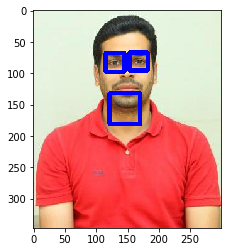

In [24]:
#Call the function:
result_image = detect_eyes(image_tejas)

#Check the result:
plt.imshow(result_image)
plt.show()

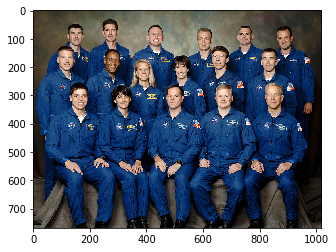

In [25]:
#Convert Image to gray scale(optional):
#gray_face_image = cv2.cvtColor(face_img,cv2.COLOR_RGB2GRAY)

#Test on Group Image:
eye_detection_group = detect_eyes(image_group)

#Check the result:
plt.imshow(eye_detection_group)
plt.show()

#### Face detection in Video(Live) mode:

In [27]:
#Create an Object of Video Capture Class:
cap = cv2.VideoCapture(0)

while True:
    
    #Call 'read' method of Capture object:
    ret,frame = cap.read(0)
    
    #Call 'detect_face' function & pass the frame as an image:
    frame = adjusted_detect_face(frame)
    
    #Show the image:
    cv2.imshow("Video Face Detect",frame)
    
    #Wait:
    k = cv2.waitKey(1)
    if k == 27:
        break

#Release the Camera:
cap.release()

#Destroy all Windows:
cv2.destroyAllWindows()

#### Eye Detection in Live Video Mode:

In [28]:
#Create an Object of Video-Capture class:
cap_obj = cv2.VideoCapture(0)

while True:
    
    #Call 'read' method of 'Capture' object:
    ret,frame = cap_obj.read(0)
    
    #Call 'detect_eyes' function & pass the frame as an argument:
    frame = detect_eyes(frame)
    
    #Show the image-window:
    cv2.imshow("Video-Eye Detect",frame)
    
    #Wait till 'ecs' key pressed:
    k = cv2.waitKey(1)
    if k == 27:
        break

#Release the Camera:
cap_obj.release()

#Distroy all Windows:
cv2.destroyAllWindows()